In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd 
countries_of_interest_df = pd.read_csv("merged_Dataset.csv")

C:\Users\samue\AppData\Local\Temp\ipykernel_41848\444942925.py:5: DtypeWarning: Columns (148,150,151,152,154,156,157,158) have mixed types. Specify dtype option on import or set low_memory=False.
  countries_of_interest_df = pd.read_csv("merged_Dataset.csv")


Helper Functions

In [80]:
#this function will be used to get the total number of people migrated from a country in the given year, if you dont provide the destination country
#then you will get the total number of people migrated from the origin country regarless of the destination country

def col_sum( source, year,gender,age, type, origin_country=None, destination_country = None):
    """
        source : String 
               for dataset from EUROSTAT 'ESTAT'
               for dataset from UN 'UN'
        
        year :String 
                year for the data
        gender : String 
                'T' for both, 
                'M' for Male, 
                'F' for Female
        age : String 
                'T' for all ages, 
                for below 15 '<15', 
                between 15- 64 '15-64',
                above 64 '>64',
        type : String 
               for citizen type migration 'cit',
               for residence type migration 'res'
        origin_country : String 
                name of the origin country
        origin_country: String  
                name of the origin country
        destination_country : 
                String name of the destination country
        
    
    """
    if origin_country and destination_country:
        
        value = countries_of_interest_df[(countries_of_interest_df['origin_name']==origin_country) & (countries_of_interest_df['destination_name']==destination_country)][f'{source}_{year}_{gender}_{age}_{type}'].sum()

    elif origin_country:
        
        value = countries_of_interest_df[(countries_of_interest_df['origin_name']==origin_country)][f'{source}_{year}_{gender}_{age}_{type}'].sum()
    
    return value




In [81]:
#this function with the help of col_sum() function will built a bar graph for a country showing the total number of people, 
#total number of male and total number of female migrated from that country in the time span of 5 years from 2014-2019 for ESTAT
#and from 2015-2019 for UN dataset
def bar_graph_of_country(origin_country, source, type):
    '''
        source : String 
               for dataset from EUROSTAT 'ESTAT'
               for dataset from UN 'UN'
        origin_country: String  
                name of the origin country
        type : String 
               for citizen type migration 'cit',
               for residence type migration 'res'
    '''
    if source == "UN": #for UN we have data for the years 2015-2019
        graph_for_a_country = {'2015':{'Both':col_sum(source, "2015", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2015", "M", "T", type, origin_country  ),'Female': col_sum(source, "2015", "F", "T", type, origin_country  )},
                                                                                    '2016':{'Both':col_sum(source, "2016", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2016", "M", "T", type, origin_country  ),'Female': col_sum(source, "2016", "F", "T", type, origin_country  )},
                                                                                    '2017':{'Both':col_sum(source, "2017", "T", "T", type, origin_country ), 'Male':col_sum(source, "2017", "M", "T", type, origin_country  ),'Female': col_sum(source, "2017", "F", "T", type, origin_country  )},
                                                                                    '2018':{'Both':col_sum(source, "2018", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2018", "M", "T", type, origin_country  ),'Female': col_sum(source, "2018", "F", "T", type, origin_country  )},
                                                                                    '2019':{'Both':col_sum(source, "2019", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2019", "M", "T", type, origin_country  ),'Female': col_sum(source, "2019", "F", "T", type, origin_country )}
                                                                                    }

    else: #for ESTAT we have data for the years 2014-2019
        graph_for_a_country = {'2014':{'Both':col_sum(source, "2014", "T", "T", type, origin_country ), 'Male':col_sum(source, "2014", "M", "T", type, origin_country  ),'Female': col_sum(source, "2014", "F", "T", type, origin_country  )},
                                                                                    '2015':{'Both':col_sum(source, "2015", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2015", "M", "T", type, origin_country  ),'Female': col_sum(source, "2015", "F", "T", type, origin_country  )},
                                                                                    '2016':{'Both':col_sum(source, "2016", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2016", "M", "T", type, origin_country  ),'Female': col_sum(source, "2016", "F", "T", type, origin_country  )},
                                                                                    '2017':{'Both':col_sum(source, "2017", "T", "T", type, origin_country ), 'Male':col_sum(source, "2017", "M", "T", type, origin_country  ),'Female': col_sum(source, "2017", "F", "T", type, origin_country  )},
                                                                                    '2018':{'Both':col_sum(source, "2018", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2018", "M", "T", type, origin_country  ),'Female': col_sum(source, "2018", "F", "T", type, origin_country  )},
                                                                                    '2019':{'Both':col_sum(source, "2019", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2019", "M", "T", type, origin_country  ),'Female': col_sum(source, "2019", "F", "T", type, origin_country )}
                                                                                    }
    
    return graph_for_a_country

    
    

Bar graph showing Male, Female and Both(Male and Female) ratio of the imigrants with residence status in the respective years w.r.t the origin country. The results are for ESTAT dataset.

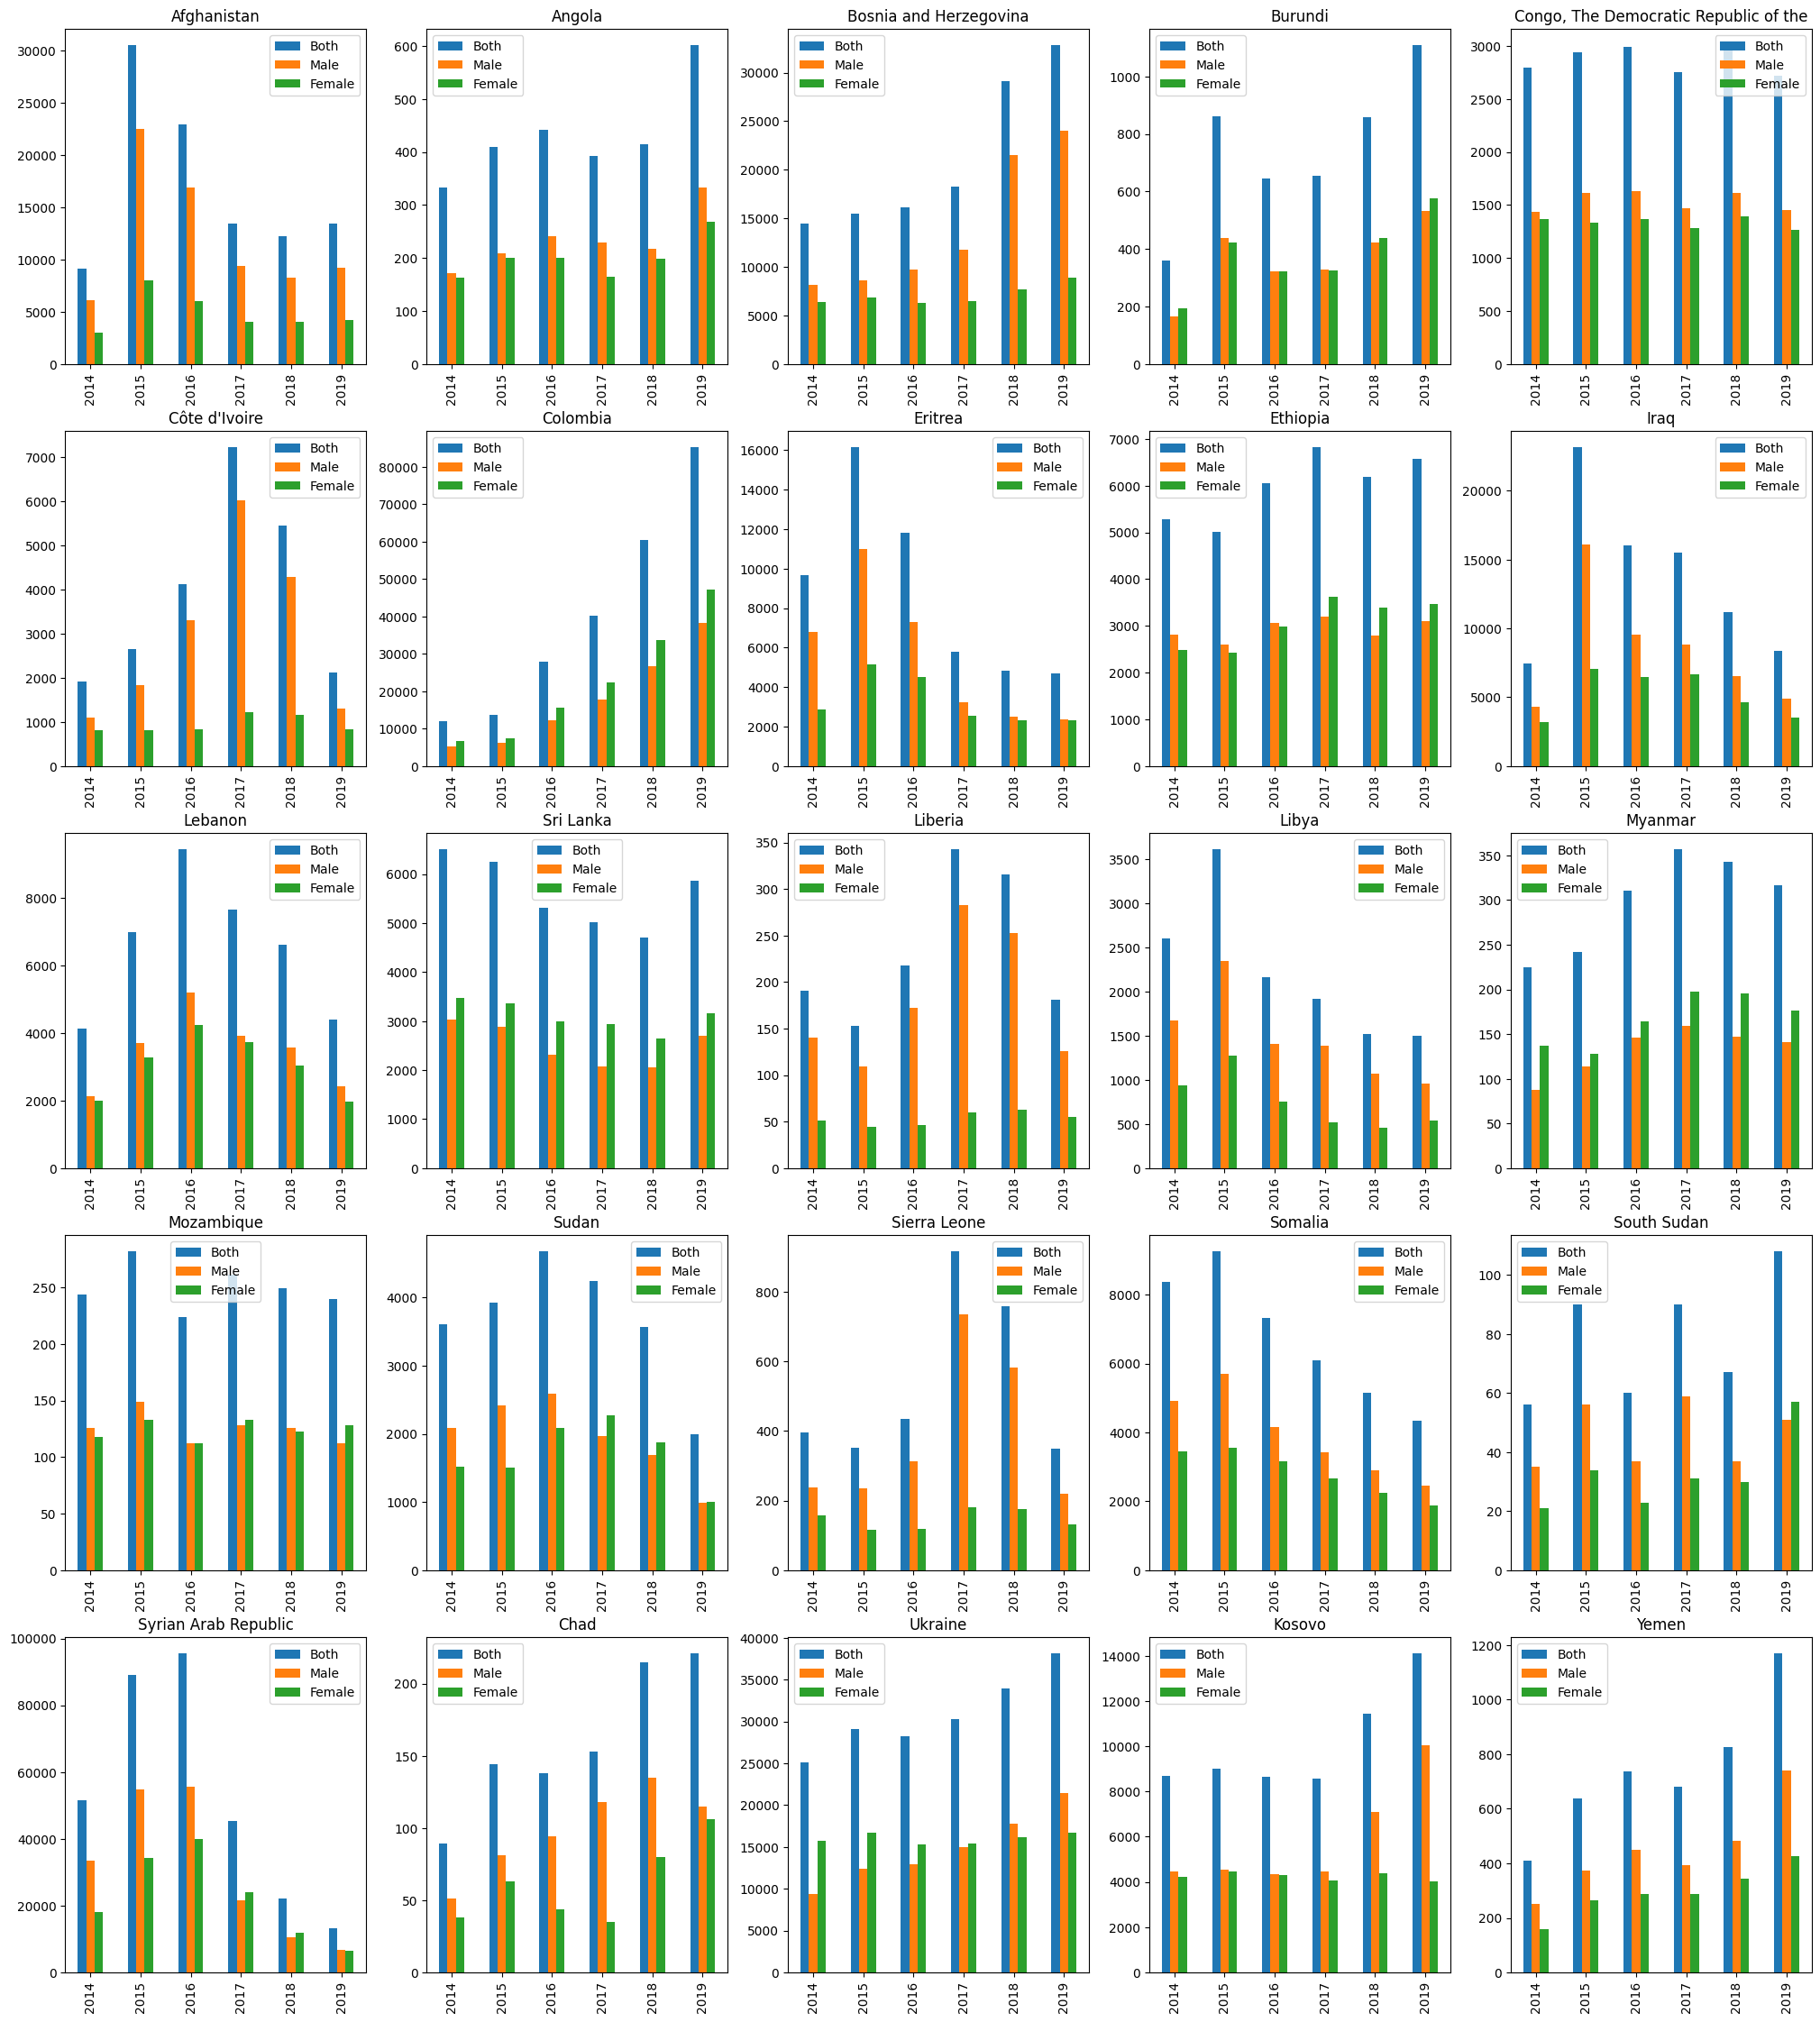

In [82]:

#geting a list of the unique country names
country_names = countries_of_interest_df['origin_name'].unique().tolist()
#dividing the single list into 5 nested lists for convenience for the later part where we will plot graph
country_names = [country_names[i:i+5] for i in range(0, len(country_names), 5)]
fig, axes = plt.subplots(5, 5, figsize=(25,28))
#by making nested lists we can iterated over the country names and also plot the graph at the given axis easily
for i in range(0,5):
    for j in range(0,5):
        graph_for_a_country = bar_graph_of_country(country_names[i][j], "ESTAT", "res")
        x = pd.DataFrame(graph_for_a_country)
        #this is the part where our nested list will come handy, we can use the same i and j indices for axis[i,j] 
        #that we used above to fetch country name
        x.transpose().plot(ax=axes[i,j], kind='bar', title= country_names[i][j])
    






Examining the graph from Euro estate's dataset, it becomes evident that, generally, more men migrate compared to women in various countries. However, there are instances where the migration rate for women slightly exceeds that of men. Notably, in countries such as Sri Lanka, Myanmar, Sudan, Mozambique, Colombia, Ethiopia, and Madagascar, instances occur where women's migration rate surpasses that of men, highlighting significant variations in migration patterns between genders and showcasing distinct trends in specific countries.

By conducting a simple search on the internet to find the reason, we discover that gender disparities in migration are influenced by factors like a preference for societies with gender equality, economic opportunities, and sociocultural elements. Women often migrate independently in search of better work and education, contributing to a more balanced gender representation in migration flows. Stable nations tend to exhibit a more even gender distribution in migration, fostering opportunities for both men and women.

Education and empowerment play key roles in driving female migration, as women seek growth in societies offering these opportunities. Government policies promoting gender equality also shape migration patterns. A comprehensive understanding requires exploration of specific data points, recognizing the complex interplay of economic, social, and political factors in migration dynamics.


Bar graph showing Male, Female and Both(Male and Female) ratio of the imigrants with citizenship status in the respective years w.r.t the origin country. The results are for ESTAT dataset.

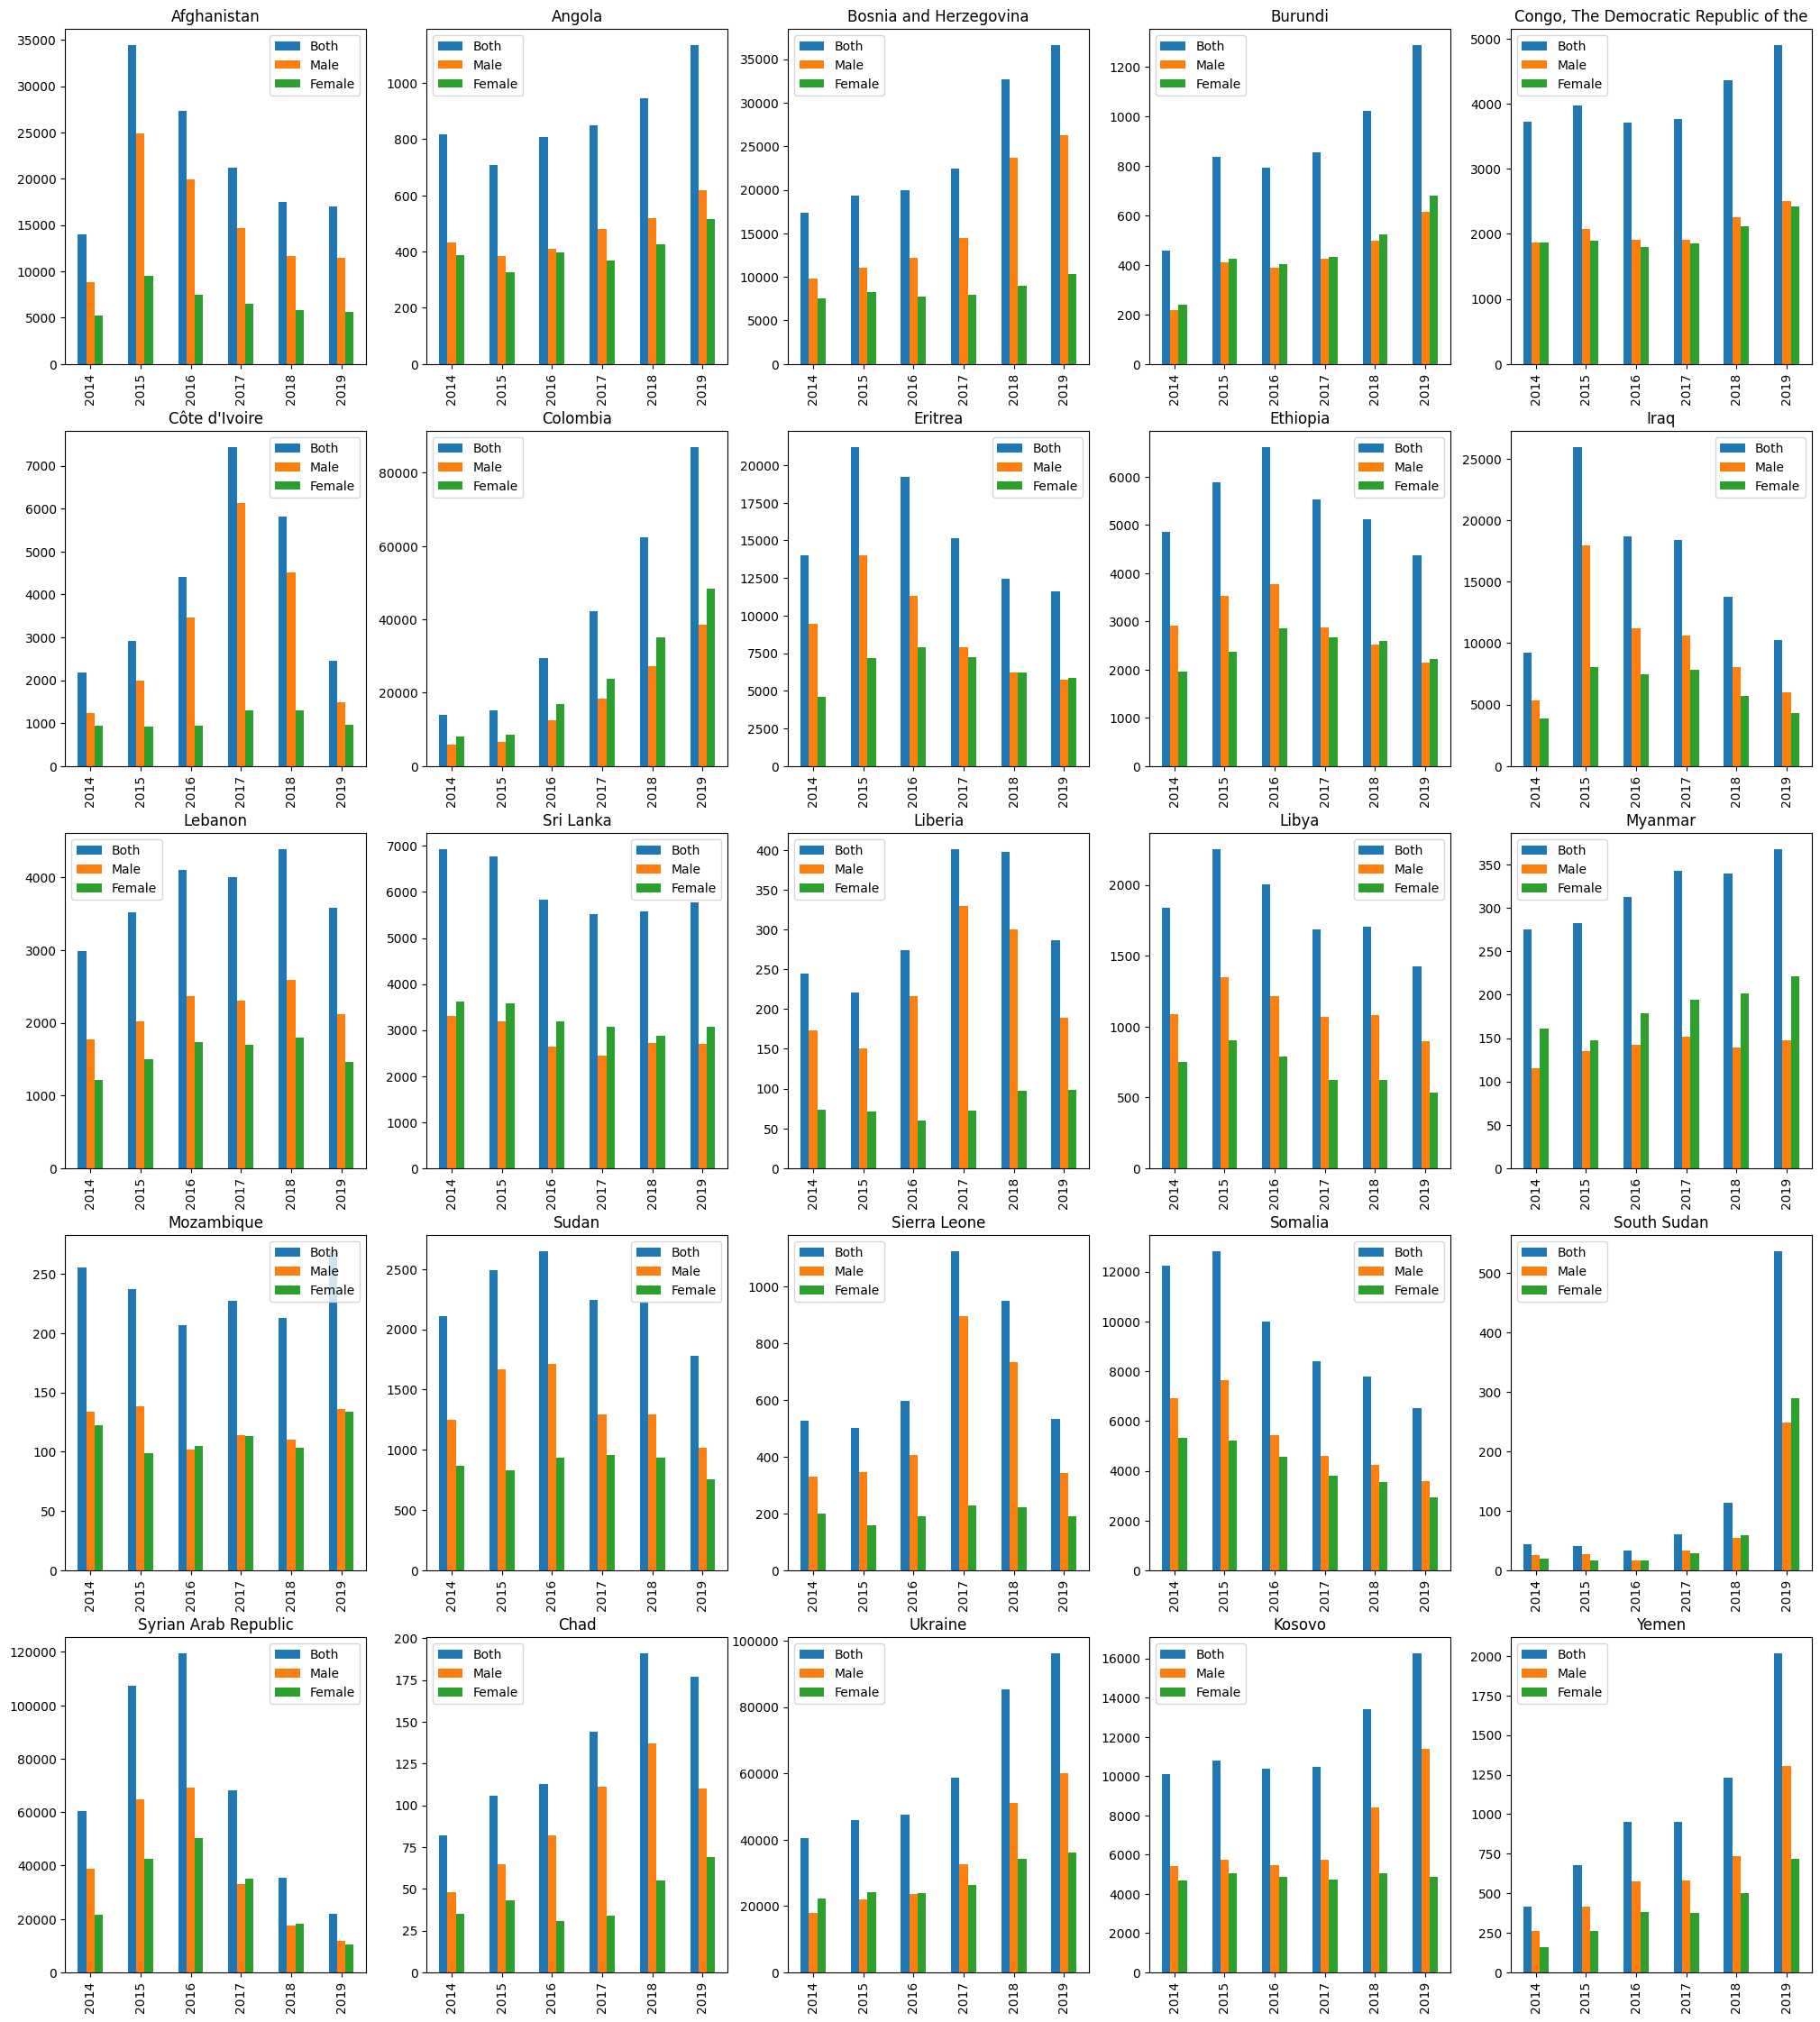

In [83]:
#geting a list of the unique country names
country_names = countries_of_interest_df['origin_name'].unique().tolist()
#dividing the single list into 5 nested lists for convenience for the later part where we will plot graph
country_names = [country_names[i:i+5] for i in range(0, len(country_names), 5)]
fig, axes = plt.subplots(5, 5, figsize=(25,28))
#by making nested lists we can iterated over the country names and also plot the graph at the given axis easily
for i in range(0,5):
    for j in range(0,5):
        graph_for_a_country = bar_graph_of_country(country_names[i][j], "ESTAT", "cit")
        x = pd.DataFrame(graph_for_a_country)
        #this is the part where our nested list will come handy, we can use the same i and j indices for axis[i,j] 
        #that we used above to fetch country name
        x.transpose().plot(ax=axes[i,j], kind='bar', title= country_names[i][j])